<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment1/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np

import math

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.load('/content/drive/My Drive/ML/Assignment_1/x_train.npy',encoding ='bytes')
y_train =  np.load('/content/drive/My Drive/ML/Assignment_1/y_train.npy',encoding='bytes')
x_test =  np.load('/content/drive/My Drive/ML/Assignment_1/x_test.npy',encoding='bytes')
y_test =  np.load('/content/drive/My Drive/ML/Assignment_1/y_test.npy',encoding='bytes')

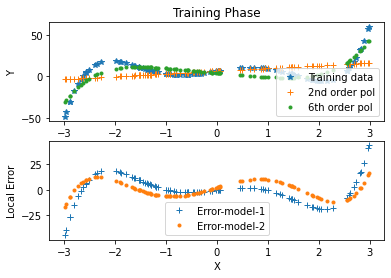

Mean square error model-1: 169.33131794385173
Mean square error model-2: 49.67165651563685


In [ ]:
# Univariate Polynomial Regression

class PolynomailRegression() :
 
 def __init__( self, degree, learning_rate, iterations ) :
  
  self.degree = degree
  
  self.learning_rate = learning_rate
  
  self.iterations = iterations

  
 # function to transform X
 
 def transform( self, X ) :
  
  # initialize X_transform
  
  X_transform = np.ones( ( self.m, 1 ) )
  
  j = 0
 
  for j in range( self.degree + 1 ) :
   
   if j != 0 :
    
    x_pow = np.power( X, j )
    
    # append x_pow to X_transform
    
    X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )

  return X_transform  
 
 # function to normalize X_transform
 
 def normalize( self, X ) :
  
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  
  return X
  
 # model training
 
 def fit( self, X, Y ) :
  
  self.X = X
 
  self.Y = Y
 
  self.m, self.n = self.X.shape
 
  # weight initialization
 
  self.W = np.zeros( self.degree +1)
  
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( self.X )
  
  # normalize X_transform
  
  X_normalize = self.normalize( X_transform )
  # gradient descent learning
 
  for i in range( self.iterations ) :
   
   h = self.predict( self.X )
  
   error = h - self.Y
   # update weights
  
   self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
  
  return self
 # predict
 
 def predict( self, X ) :
 
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( X )
  
  X_normalize = self.normalize( X_transform )
  
  return np.dot( X_transform, self.W )
 
 
# Driver code 

def main() :
 
 # Create dataset
 
 X = x_train
 
 Y = y_train

 # model training-using two different model with different degrees of polinomial function
 
 model = PolynomailRegression( degree = 2,  learning_rate = 0.01, iterations = 1500 )
 model1 = PolynomailRegression( degree = 6,learning_rate = 0.01, iterations = 1500 )

 model.fit( X, Y )
 model1.fit(X,Y)
 # Prediction on training set

 Y_pred = model.predict( X )
 Y_pred1 = model1.predict(X)
 # Visualization
 
 fig,ax = plt.subplots(2,1)
 ax[0].plot( X, Y,  '*', label = 'Training data' )
 
 ax[0].plot( X, Y_pred, '+', label='2nd order pol' )
 ax[0].plot(X,Y_pred1, '.', label = '6th order pol')
 
 ax[0].set_title( 'Training Phase' )
 
 ax[0].set_xlabel( 'X' )
 
 ax[0].set_ylabel( 'Y' )
 ax[0].legend()
 ax[1].plot(X,Y-Y_pred, '+', label = 'Error-model-1')
 ax[1].plot(X,Y-Y_pred1, '.', label = 'Error-model-2')
 
 ax[1].set_xlabel( 'X' )
 
 ax[1].set_ylabel( 'Local Error' )   #Local error = Training/Test Data - Prediction
 ax[1].legend()
 plt.show()
 print('Mean square error model-1:', ((Y - Y_pred) ** 2).mean(axis=None))
 print('Mean square error model-2:', ((Y - Y_pred1) ** 2).mean(axis=None))



if __name__ == "__main__" :
 
 main()

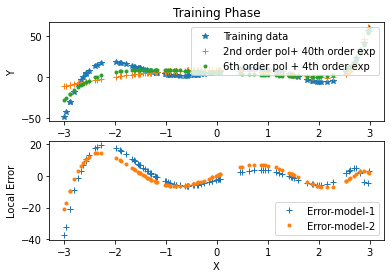

Mean square error model-1: 74.77967310230956
Mean square error model-2: 39.180431380306786


In [ ]:

# Univariate Polynomial Regression

class PolynomailRegression() :
 
 def __init__( self, degree, exp_degree, learning_rate, iterations ) :
  
  self.degree = degree
  
  self.learning_rate = learning_rate
  
  self.iterations = iterations
  self.exp_degree = exp_degree
  
 # function to transform X
 
 def transform( self, X ) :
  
  # initialize X_transform
  
  X_transform = np.ones( ( self.m, 1 ) )
  
  j = 0
 
  for j in range( self.degree + 1 ) :
   
   if j != 0 :
    
    x_pow = np.power( X, j )
    
    # append x_pow to X_transform
    
    X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )

  for k in range(0,self.exp_degree+1):
    if k != 0 :
      exponential = np.exp(k*X)
      X_transform = np.append(X_transform,exponential.reshape(-1,1), axis=1)   #along with polinomial we took exponential function to check the performance on training

  return X_transform  
 
 # function to normalize X_transform
 
 def normalize( self, X ) :
  
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  
  return X
  
 # model training
 
 def fit( self, X, Y ) :
  
  self.X = X
 
  self.Y = Y
 
  self.m, self.n = self.X.shape
 
  # weight initialization
 
  self.W = np.zeros( self.degree +self.exp_degree+1)
  
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( self.X )
  
  # normalize X_transform
  
  X_normalize = self.normalize( X_transform )
    
  # gradient descent learning
 
  for i in range( self.iterations ) :
   
   h = self.predict( self.X )
  
   error = h - self.Y
   
   # update weights
  
   self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
  
  return self
 
 # predict
 
 def predict( self, X ) :
 
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( X )
  
  X_normalize = self.normalize( X_transform )
  
  return np.dot( X_transform, self.W )
 
 
# Driver code 

def main() :
 
 # Create dataset
 
 X = x_train
 
 Y = y_train

 # model training
 
 model = PolynomailRegression( degree = 2, exp_degree = 40, learning_rate = 0.01, iterations = 500 )
 model1 = PolynomailRegression( degree = 6,exp_degree=4, learning_rate = 0.01, iterations = 500 )

 model.fit( X, Y )
 model1.fit(X,Y)
 # Prediction on training set

 Y_pred = model.predict( X )
 Y_pred1 = model1.predict(X)
 # Visualization
 fig,ax = plt.subplots(2,1)
 ax[0].plot( X, Y,  '*', label = 'Training data' )
 
 ax[0].plot( X, Y_pred, '+', label='2nd order pol+ 40th order exp' )
 ax[0].plot(X,Y_pred1, '.', label = '6th order pol + 4th order exp')
 
 ax[0].set_title( 'Training Phase' )
 
 ax[0].set_xlabel( 'X' )
 
 ax[0].set_ylabel( 'Y' )
 ax[0].legend()
 ax[1].plot(X,Y-Y_pred, '+', label = 'Error-model-1')
 ax[1].plot(X,Y-Y_pred1, '.', label = 'Error-model-2')
 
 ax[1].set_xlabel( 'X' )
 
 ax[1].set_ylabel( 'Local Error' )
 ax[1].legend()
 plt.show()
 print('Mean square error model-1:', ((Y - Y_pred) ** 2).mean(axis=None))
 print('Mean square error model-2:', ((Y - Y_pred1) ** 2).mean(axis=None))

if __name__ == "__main__" :
 
 main()


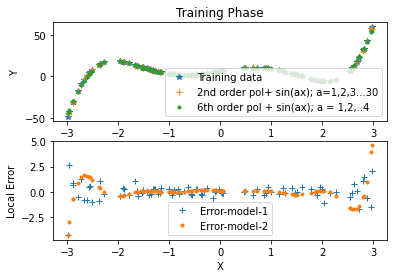

Mean square error model-1: 0.5523120106192924
Mean square error model-2: 0.9860395981545836


In [ ]:
class PolynomailRegression() :
 
 def __init__( self, degree, exp_degree, learning_rate, iterations ) :
  
  self.degree = degree
  
  self.learning_rate = learning_rate
  
  self.iterations = iterations
  self.exp_degree = exp_degree
  
 # function to transform X
 
 def transform( self, X ) :
  
  # initialize X_transform
  
  X_transform = np.ones( ( self.m, 1 ) )
  
  j = 0
 
  for j in range( self.degree + 1 ) :
   
   if j != 0 :
    
    x_pow = np.power( X, j )
    
    # append x_pow to X_transform
    
    X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )

  for k in range(0,self.exp_degree+1):
    if k != 0 :
      sinusoidal = np.sin(k*X)             # now we are combining sin function with the polinomials
      X_transform = np.append(X_transform,sinusoidal.reshape(-1,1), axis=1)

  return X_transform  
 
 # function to normalize X_transform
 
 def normalize( self, X ) :
  
  X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
  
  return X
  
 # model training
 
 def fit( self, X, Y ) :
  
  self.X = X
 
  self.Y = Y
 
  self.m, self.n = self.X.shape
 
  # weight initialization
 
  self.W = np.zeros( self.degree +self.exp_degree+1)
  
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( self.X )
  
  # normalize X_transform
  
  X_normalize = self.normalize( X_transform )
    
  # gradient descent learning
  for i in range( self.iterations ) :
   
   h = self.predict( self.X )
  
   error = h - self.Y
   
   # update weights
  
   self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
  
  return self
 
 # predict
 
 def predict( self, X ) :
 
  # transform X for polynomial h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
  
  X_transform = self.transform( X )
  
  X_normalize = self.normalize( X_transform )
  
  return np.dot( X_transform, self.W )
 
 
# Driver code 

def main() :
 
 # Create dataset
 
 X = x_train
 
 Y = y_train

 # model training
 
 model = PolynomailRegression( degree = 2, exp_degree = 30, learning_rate = 0.01, iterations = 1500 )
 model1 = PolynomailRegression( degree = 6,exp_degree=4, learning_rate = 0.01, iterations = 1500 )                

 model.fit( X, Y )
 model1.fit(X,Y)
 # Prediction on training set

 Y_pred = model.predict( X )
 Y_pred1 = model1.predict(X)
 # Visualization
 fig,ax = plt.subplots(2,1)
 ax[0].plot( X, Y,  '*', label = 'Training data' )
 
 ax[0].plot( X, Y_pred, '+', label='2nd order pol+ sin(ax); a=1,2,3...30' )
 ax[0].plot(X,Y_pred1, '.', label = '6th order pol + sin(ax); a = 1,2,..4')
 
 ax[0].set_title( 'Training Phase' )
 
 ax[0].set_xlabel( 'X' )
 
 ax[0].set_ylabel( 'Y' )
 ax[0].legend()
 ax[1].plot(X,Y-Y_pred, '+', label = 'Error-model-1')
 ax[1].plot(X,Y-Y_pred1, '.', label = 'Error-model-2')
 
 ax[1].set_xlabel( 'X' )
 
 ax[1].set_ylabel( 'Local Error' )
 ax[1].legend()
 plt.show()
 print('Mean square error model-1:', ((Y - Y_pred) ** 2).mean(axis=None))
 print('Mean square error model-2:', ((Y - Y_pred1) ** 2).mean(axis=None)) 

if __name__ == "__main__" :
 
 main()

Based on the training data performance, we took the combination of polinomial and sine (3rd model) as the basis function and checked the performance on the test data.

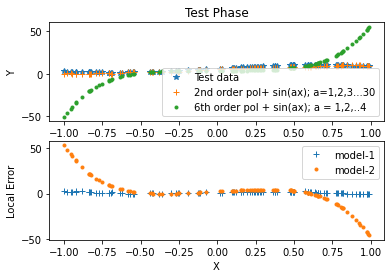

Mean square error model-1: 2.095571764971753
Mean square error model-2: 305.5796618466716


In [ ]:
# Driver code 

def main() :
 
 # Create dataset
 
 X = x_train
 
 Y = y_train

 # model training
 
 model = PolynomailRegression( degree = 2, exp_degree = 30, learning_rate = 0.01, iterations = 1500 )
 model1 = PolynomailRegression( degree = 6,exp_degree=4, learning_rate = 0.01, iterations = 1500 )                

 model.fit( X, Y )
 model1.fit(X,Y)
 # Prediction on test set

 Y_pred = model.predict( x_test)
 Y_pred1 = model1.predict(x_test)
 # Visualization
 
 fig,ax = plt.subplots(2,1)
 ax[0].plot( x_test, y_test,  '*', label = 'Test data' )
 
 ax[0].plot( x_test, Y_pred, '+', label='2nd order pol+ sin(ax); a=1,2,3...30' )
 ax[0].plot(x_test,Y_pred1, '.', label = '6th order pol + sin(ax); a = 1,2,..4')
 
 ax[0].set_title( 'Test Phase' )
 
 ax[0].set_xlabel( 'X' )
 
 ax[0].set_ylabel( 'Y' )
 ax[0].legend()
 y_test1 = y_test.reshape(100)
 ax[1].plot(x_test,y_test1-Y_pred,'+', label = 'model-1')
 ax[1].plot(x_test,y_test1-Y_pred1, '.', label = 'model-2')
 ax[1].set_xlabel('X')
 ax[1].set_ylabel('Local Error')
 ax[1].legend()
 plt.show()
 print('Mean square error model-1:', ((y_test1 - Y_pred) ** 2).mean(axis=None))
 print('Mean square error model-2:', ((y_test1 - Y_pred1) ** 2).mean(axis=None))
if __name__ == "__main__" :
 
 main()

1. After visualizing test data, we got the clue that sinusoidals are required in the features. So we added sin function with our polinomials and obtained pretty accurate results in training set(Local error less than 5 and Mean square error than 1) First we normalized our data with the mean and standard deviation for better performance. 
2.(a) No the relationship is not linear. 
(b) Yes, we need feature engineering for adding non-linearity.
(i) Since both the train and test set is nonlinear, polinomial function is required, so I used several combinations of polinomials, exponentials and sinusoidals to fit the train set.  
  (ii)I tried three different set of feature engineering:[1]polinomials, [2]polinomials+exponentials, [3] polinomials +sinusoidals. I tried to combine different features in the bases to come up with the best possible result with least complexity(weights). 
Based on the performance on training set we tried our model in test set and obtained mean square error of 2.096 for basis= x+x2+sinx+.....sin(30x)
